In [16]:
import pandas as pd

# Map users to 1, 2, 3 and 4

data = pd.DataFrame({'user_id': [0, 1, 2, 3, 1, 3],
                     'item1': [5, 2, 1, 4, 1, 3],
                     'item2': [4, 4, 2, 3, 2, 3],
                     'item3': [3, 5, 4, 2, 3, 3],
                     'item4': [1, 2, 5, 1, 3, 3]})

# Set 'user_id' column as the index
data.set_index('user_id', inplace=True)

In [17]:
data

,item1,item2,item3,item4
user_id,,,,
0,5,4,3,1
1,2,4,5,2
2,1,2,4,5
3,4,3,2,1
1,1,2,3,3
3,3,3,3,3


In [18]:
data = data.reset_index().groupby('user_id').mean()

In [19]:
data

,item1,item2,item3,item4
user_id,,,,
0,5.0,4.0,3.0,1.0
1,1.5,3.0,4.0,2.5
2,1.0,2.0,4.0,5.0
3,3.5,3.0,2.5,2.0


In [118]:
data.to_csv('ratings.csv')

## UserBasedCollaborativeFiltering

In [21]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

class UserBasedCollaborativeFiltering:
    def __init__(self, data_path):
        self.data = pd.read_json(data_path)
        self.user_similarity = cosine_similarity(self.data)
    
    def get_similar_users(self, user_id, top_n=5):
        user_scores = list(enumerate(self.user_similarity[user_id])) 
        user_scores = sorted(user_scores, key=lambda x: x[1], reverse=True)
        similar_users = [user for user, _ in user_scores[1:top_n+1]]
        
        return similar_users

# Usage for UserBasedCollaborativeFiltering
filtering = UserBasedCollaborativeFiltering('ratings.csv')
user_id = 1
similar_users = filtering.get_similar_users(user_id)
print(similar_users)

[2, 3, 0]


In [120]:
# Usage for UserBasedCollaborativeFiltering
filtering = UserBasedCollaborativeFiltering('ratings.csv')
user_id = 1
similar_users = filtering.get_similar_users(user_id)
print(f"Most similar users to user {user_id}:")
for user in similar_users:
    print(user)

Most similar users to user 1:
2
3
0


## Item Based Collaborative Filtering

In [92]:
import pandas as pd

data = {
    'attraction': ['Sydney Opera House', 'Bondi Beach', 'The Rocks', 'Royal Botanic Garden Sydney', 'Sydney Harbour Bridge', 'Darling Harbour', 'Taronga Zoo', 'Blue Mountains', 'Hunter Valley Gardens', 'Jenolan Caves'],
    'food': [0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
    'nature': [0, 1, 0, 1, 0, 0, 0, 1, 1, 1],
    'adventure': [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
    'culture': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
    'exercise': [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    'tourist_hotspot': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'cozy': [0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
    'family': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    'wildlife': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)
print(len(df))
#df.to_csv('attractions.csv')

10


In [93]:
new_data = {
    'attraction': "Bondi to Bronte Walk",
    'food': 0,
    'nature': 1,
    'adventure': 1,
    'culture': 0,
    'exercise': 1,
    'tourist_hotspot': 1,
    'cozy': 0,
    'family': 1,
    'wildlife': 0
}
df = df.append(new_data, ignore_index=True)

<ipython-input-93-4014d3f61fc9>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_data, ignore_index=True)


In [94]:
df

,attraction,food,nature,adventure,culture,exercise,tourist_hotspot,cozy,family,wildlife
0,Sydney Opera House,0,0,0,1,0,1,0,1,0
1,Bondi Beach,1,1,1,0,1,1,0,1,1
2,The Rocks,1,0,0,1,1,1,1,1,0
3,Royal Botanic Garden Sydney,1,1,0,1,1,1,1,1,1
4,Sydney Harbour Bridge,0,0,1,0,0,1,0,0,0
5,Darling Harbour,1,0,0,1,1,1,0,1,0
6,Taronga Zoo,1,0,0,0,1,1,0,1,1
7,Blue Mountains,0,1,1,1,1,1,1,1,1
8,Hunter Valley Gardens,1,1,0,0,1,1,1,1,0
9,Jenolan Caves,0,1,1,0,0,1,0,1,1


In [95]:
df.set_index('attraction', inplace=True)

In [96]:
df

,food,nature,adventure,culture,exercise,tourist_hotspot,cozy,family,wildlife
attraction,,,,,,,,,
Sydney Opera House,0,0,0,1,0,1,0,1,0
Bondi Beach,1,1,1,0,1,1,0,1,1
The Rocks,1,0,0,1,1,1,1,1,0
Royal Botanic Garden Sydney,1,1,0,1,1,1,1,1,1
Sydney Harbour Bridge,0,0,1,0,0,1,0,0,0
Darling Harbour,1,0,0,1,1,1,0,1,0
Taronga Zoo,1,0,0,0,1,1,0,1,1
Blue Mountains,0,1,1,1,1,1,1,1,1
Hunter Valley Gardens,1,1,0,0,1,1,1,1,0


In [97]:
df.to_csv('attractions.csv')

In [107]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

class UserBasedCollaborativeFiltering:
    def __init__(self, data_path):
        self.data = pd.read_csv('attractions.csv', index_col='attraction')
        self.user_similarity = cosine_similarity(self.data)
    
    def get_similar_users(self, user_id, top_n=5):
        user_scores = list(enumerate(self.user_similarity[user_id])) 
        user_scores = sorted(user_scores, key=lambda x: x[1], reverse=True)
        similar_users = [user for user, _ in user_scores[1:top_n+1]]
        
        return similar_users

# Usage for UserBasedCollaborativeFiltering
filtering = UserBasedCollaborativeFiltering('attractions.csv')
user_id = len(df) - 1
similar_users = filtering.get_similar_users(user_id)
print(similar_users)

[1, 9, 7, 8, 3]


In [109]:
for i in similar_users:
    print(df.iloc[i])

food               1
nature             1
adventure          1
culture            0
exercise           1
tourist_hotspot    1
cozy               0
family             1
wildlife           1
Name: Bondi Beach, dtype: int64
food               0
nature             1
adventure          1
culture            0
exercise           0
tourist_hotspot    1
cozy               0
family             1
wildlife           1
Name: Jenolan Caves, dtype: int64
food               0
nature             1
adventure          1
culture            1
exercise           1
tourist_hotspot    1
cozy               1
family             1
wildlife           1
Name: Blue Mountains, dtype: int64
food               1
nature             1
adventure          0
culture            0
exercise           1
tourist_hotspot    1
cozy               1
family             1
wildlife           0
Name: Hunter Valley Gardens, dtype: int64
food               1
nature             1
adventure          0
culture            1
exercise         

In [ ]:
# Evaluation Metric



In [52]:
# class ItemBasedCollaborativeFiltering:
#     '''
#     CSESoc Flagship Hackathon. 
#     We utilised Collaborative Filtering for items to attain the top recommendations for a user. 
#     '''
#     def __init__(self, data_path):
#         self.data = pd.read_csv(data_path)
#         self.item_similarity = cosine_similarity(self.data.T)
       
#     def get_similar_items(self, item_id, top_n=5):
#         '''
#         Input: 
#             item_id: 
#             top_n: The top recommended results (default = 5)
#         Output:
#             similar_items: 
#         '''
#         item_scores = list(enumerate(self.item_similarity[item_id]))
#         item_scores = sorted(item_scores, key=lambda x: x[1], reverse=True)
#         similar_items = [item for item, _ in item_scores[1:top_n+1]]
#         return similar_items
    
#     def get_recommendations(self, user_id, top_n=5):
#         user_ratings = self.data.loc[user_id].tolist()
#         unrated_items = [i for i, rating in enumerate(user_ratings) if pd.isnull(rating)]
#         item_scores = []
        
#         for item_id in unrated_items:
#             similar_items = self.get_similar_items(item_id)
#             rating_sum = 0
#             weight_sum = 0
            
#             for similar_item in similar_items:
#                 if not pd.isnull(user_ratings[similar_item]):
#                     rating_sum += user_ratings[similar_item] * self.item_similarity[item_id, similar_item]
#                     weight_sum += self.item_similarity[item_id, similar_item]
            
#             if weight_sum > 0:
#                 item_scores.append((item_id, rating_sum / weight_sum))
        
#         item_scores = sorted(item_scores, key=lambda x: x[1], reverse=True)
#         recommended_items = [item for item, _ in item_scores[:top_n]]
#         return recommended_items

In [59]:
# Usage for ItemBasedCollaborativeFiltering
filtering = ItemBasedCollaborativeFiltering('ratings.csv')
user_id = 0
recommendations = filtering.get_recommendations(user_id)
print(f"Recommended items for user {user_id}:")
for item in recommendations:
    print(item)

Recommended items for user 0:


## YOLOv6

In [5]:
from ultralytics import YOLO
import torch 

class YOLOv6:
    '''
    Using the Object Detection Model YOLOv6 to help us get the detection results. 
    '''
    def __init__(self):
        self.model = None
        
    def load_model(self):
        self.model = YOLO("yolov6n.yaml")  # build new model from scratch
        #self.model.info()  # display model information
    
    def predict(self, img_path):
        output = self.model.predict(img_path)
        print(output)

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
img = 'operahouse.jpg'
results = model(img)
results.print()

Using cache found in /Users/williamgong/.cache/torch/hub/ultralytics_yolov5_master
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...

requirements: 1 package updated per /Users/williamgong/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2023-7-1 Python-3.8.8 torch-1.11.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1965x3201 1 person, 3 boats
Speed: 147.6ms pre-process, 314.9ms inference, 1.1ms NMS per image at shape (1, 3, 416, 640)


In [9]:
value

In [6]:
model = YOLOv6()
model.load_model()
model.predict(img_path = "https://ultralytics.com/images/zidane.jpg")

activation: nn.ReLU()

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  2     18560  ultralytics.nn.modules.conv.Conv             [32, 32, 3, 1]                
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  4    147968  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 1]                
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  6    886272  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 1]              
  7                  -1  1    295424  ultralytics.nn.modules.conv

[ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29', 30: '30', 31: '31', 32: '32', 33: '33', 34: '34', 35: '35', 36: '36', 37: '37', 38: '38', 39: '39', 40: '40', 41: '41', 42: '42', 43: '43', 44: '44', 45: '45', 46: '46', 47: '47', 48: '48', 49: '49', 50: '50', 51: '51', 52: '52', 53: '53', 54: '54', 55: '55', 56: '56', 57: '57', 58: '58', 59: '59', 60: '60', 61: '61', 62: '62', 63: '63', 64: '64', 65: '65', 66: '66', 67: '67', 68: '68', 69: '69', 70: '70', 71: '71', 72: '72', 73: '73', 74: '74', 75: '75', 76: '76', 77: '77', 78: '78', 79: '79'}
orig_img: array([[[38, 48, 72],
        [40, 50, 7

### How do I make the computer vision model generate all these different classifications?

food	nature	adventure	culture	exercise	tourist_hotspot	cozy	family	wildlife

In [47]:
data = {
        'attraction': ['Sydney Opera House', 'Bondi Beach', 'The Rocks', 'Royal Botanic Garden Sydney', 'Sydney Harbour Bridge', 'Darling Harbour', 'Taronga Zoo', 'Blue Mountains', 'Hunter Valley Gardens', 'Jenolan Caves'],
        'food': [0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
        'nature': [0, 1, 0, 1, 0, 0, 0, 1, 1, 1],
        'adventure': [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
        'culture': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        'exercise': [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
        'tourist_hotspot': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        'cozy': [0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
        'family': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        'wildlife': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1], 
        'near_cbd': [1, 0, 1, 1, 1, 1, 0, 0, 0, 0], 
        'disabled_accessibility': [1, 1, 1, 1, 0, 1, 1, 0, 0, 0]
    }
df = pd.DataFrame(data)

In [48]:
df = df.set_index("attraction")

In [49]:
df

,food,nature,adventure,culture,exercise,tourist_hotspot,cozy,family,wildlife,near_cbd,disabled_accessibility
attraction,,,,,,,,,,,
Sydney Opera House,0,0,0,1,0,1,0,1,0,1,1
Bondi Beach,1,1,1,0,1,1,0,1,1,0,1
The Rocks,1,0,0,1,1,1,1,1,0,1,1
Royal Botanic Garden Sydney,1,1,0,1,1,1,1,1,1,1,1
Sydney Harbour Bridge,0,0,1,0,0,1,0,0,0,1,0
Darling Harbour,1,0,0,1,1,1,0,1,0,1,1
Taronga Zoo,1,0,0,0,1,1,0,1,1,0,1
Blue Mountains,0,1,1,1,1,1,1,1,1,0,0
Hunter Valley Gardens,1,1,0,0,1,1,1,1,0,0,0


In [50]:
df.index

Index(['Sydney Opera House', 'Bondi Beach', 'The Rocks',
       'Royal Botanic Garden Sydney', 'Sydney Harbour Bridge',
       'Darling Harbour', 'Taronga Zoo', 'Blue Mountains',
       'Hunter Valley Gardens', 'Jenolan Caves'],
      dtype='object', name='attraction')

In [ ]:
# i could consider data augmentation and stuff when i have very little data! 

In [115]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader, Dataset
from PIL import Image


# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, index):
        image_path = self.image_paths[index]
        image = Image.open(image_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        label = self.labels[index]
        
        return image, label

# # Define the CNN model with fine-tuning
# class FineTunedModel(nn.Module):
#     def __init__(self, num_classes):
#         super(FineTunedModel, self).__init__()
#         self.resnet = models.resnet18(pretrained=True)
#         for param in self.resnet.parameters():
#             param.requires_grad = False
#         self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

#     def forward(self, x):
#         x = self.resnet(x)
#         return x

class FineTunedModel(nn.Module):
    def __init__(self, num_classes):
        super(FineTunedModel, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        for param in self.resnet.parameters():
            param.requires_grad = False
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),  # Dropout layer with 50% probability
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.resnet(x)
        return x

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the paths to your images and corresponding labels
image_paths = ['./images/operahouse.jpg', './images/bondi_beach.jpg', './images/the_rocks.jpg',
       './images/royal_botanic_garden.jpg', './images/sydney_harbour_bridge.jpg',
       './images/darling_harbour.jpg', './images/taronga_zoo.jpg', './images/blue_mountains.jpg',
       './images/hunter_valley_gardens.jpg', './images/jenolan_caves.jpg']
labels = torch.tensor([
    [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1],  # Label for image1
    [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1],  
    [1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1], 
    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], 
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], 
    [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], 
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], 
    [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0], 
    [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]
], dtype=torch.float)


In [8]:
# train_transform = transforms.Compose([
#     transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

In [116]:
# Define transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),     # Resize to a common size
    transforms.ToTensor(),              # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images
])

# Create the dataset
dataset = CustomDataset(image_paths, labels, transform=transform)

# Split the dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

### WOIAODIJJWJDIJW
#train_dataset = CustomDataset(image_paths, labels, transform=train_transform)

# Define data loaders
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model with fine-tuning
num_classes = 11
model = FineTunedModel(num_classes)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Train the model
# num_epochs = 10
# for epoch in range(num_epochs):
#     model.train()
#     for images, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#     # Print the loss after each epoch
#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    
# train_loss_list = []
# test_accuracy_list = []

# # Calculate the training loss
# train_loss_list.append(loss.item())

# # Test the model
# model.eval()
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for images, labels in test_loader:
#         outputs = model(images)
#         predicted_labels = (torch.sigmoid(outputs) >= 0.5).float()
#         total += labels.size(0)
#         correct += (predicted_labels == labels).sum().item()

#     accuracy = correct / total
#     print(f'Test Accuracy: {accuracy * 100}%')

# Test the model
# model.eval()
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for images, labels in test_loader:
#         outputs = model(images)
#         predicted_labels = (torch.sigmoid(outputs) >= 0.5).float()
#         total += labels.size(0)
#         correct += (predicted_labels == labels).sum().item()

#         batch_accuracy = correct / total
#         test_accuracy_list.append(batch_accuracy)





Epoch [1/25], Loss: 0.7017, Test Accuracy: 4.5000
Epoch [2/25], Loss: 0.6200, Test Accuracy: 4.5000
Epoch [3/25], Loss: 0.5470, Test Accuracy: 5.0000
Epoch [4/25], Loss: 0.5380, Test Accuracy: 5.0000
Epoch [5/25], Loss: 0.4760, Test Accuracy: 4.5000
Epoch [6/25], Loss: 0.4603, Test Accuracy: 5.0000
Epoch [7/25], Loss: 0.3951, Test Accuracy: 5.0000
Epoch [8/25], Loss: 0.4263, Test Accuracy: 5.0000
Epoch [9/25], Loss: 0.3492, Test Accuracy: 5.0000
Epoch [10/25], Loss: 0.3245, Test Accuracy: 4.5000
Epoch [11/25], Loss: 0.3005, Test Accuracy: 5.0000
Epoch [12/25], Loss: 0.2529, Test Accuracy: 5.5000
Epoch [13/25], Loss: 0.2610, Test Accuracy: 5.5000
Epoch [14/25], Loss: 0.2528, Test Accuracy: 5.5000
Epoch [15/25], Loss: 0.2225, Test Accuracy: 5.5000
Epoch [16/25], Loss: 0.2059, Test Accuracy: 5.5000
Epoch [17/25], Loss: 0.1924, Test Accuracy: 5.0000
Epoch [18/25], Loss: 0.1960, Test Accuracy: 5.5000
Epoch [19/25], Loss: 0.1663, Test Accuracy: 5.0000
Epoch [20/25], Loss: 0.2118, Test Accura

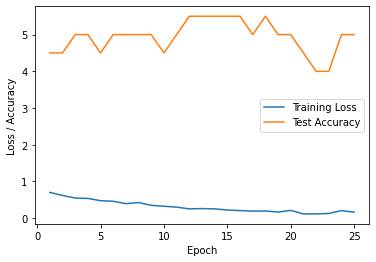

In [117]:
train_loss_list = []
test_accuracy_list = []

# Train the model
num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    # Calculate the average training loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    train_loss_list.append(epoch_loss)

    # Calculate the test accuracy
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            outputs = model(images)
            predicted_labels = (torch.sigmoid(outputs) >= 0.5).float()
            total += labels.size(0)
            correct += (predicted_labels == labels).sum().item()

        accuracy = correct / total
        test_accuracy_list.append(accuracy)

    # Print the loss and accuracy after each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Plot the learning curve
plt.plot(range(1, num_epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()


In [118]:
# torch.save(model.state_dict(), 'model.pth')
torch.save(model.state_dict(), 'model_learning_curve.pth')

In [120]:
# Saving and Loading the model afterwards

model = FineTunedModel(num_classes)
model.load_state_dict(torch.load('model_learning_curve.pth'))

image = Image.open('./test/manly_spit.jpg').convert('RGB')
image = transform(image)
image = image.unsqueeze(0)  # Add an extra dimension for batch size

# Make predictions
with torch.no_grad():
    output = model(image)
    probabilities = torch.sigmoid(output)
    predicted_labels = (probabilities >= 0.4).squeeze().tolist()

In [113]:
probabilities 

# manly_spit
#tensor([[0.5315, 0.0679, 0.4801, 0.1725, 0.5629, 0.9994, 0.1928, 0.9808, 0.3126,
#         0.6742, 0.6396]])

tensor([[0.7161, 0.3194, 0.2352, 0.3069, 0.7405, 0.9963, 0.1086, 0.9718, 0.3872,
         0.3533, 0.5869]])

In [110]:
predicted_labels

[True, False, False, False, True, True, False, True, False, True, True]

In [ ]:
new_data = {
    'food': predicted_labels[0],
    'nature': predicted_labels[1],
    'adventure': predicted_labels[2],
    'culture': predicted_labels[3],
    'exercise': predicted_labels[4],
    'tourist_hotspot': predicted_labels[5],
    'cozy': predicted_labels[6],
    'family': predicted_labels[7],
    'wildlife': predicted_labels[8], 
    'near_cbd': predicted_labels[9],
    'disabled_access': predicted_labels[10]
}
new_data

AS:ODIJA:OSId

In [69]:
image = Image.open('./test/manly_spit.jpg').convert('RGB')
image = transform(image)
image = image.unsqueeze(0)  # Add an extra dimension for batch size

# Make predictions
with torch.no_grad():
    output = model(image)
    probabilities = torch.sigmoid(output)
    predicted_labels = (probabilities >= 0.5).squeeze().tolist()

In [80]:
new_data = {
    'food': predicted_labels[0],
    'nature': predicted_labels[1],
    'adventure': predicted_labels[2],
    'culture': predicted_labels[3],
    'exercise': predicted_labels[4],
    'tourist_hotspot': predicted_labels[5],
    'cozy': predicted_labels[6],
    'family': predicted_labels[7],
    'wildlife': predicted_labels[8], 
    'near_cbd': predicted_labels[9],
    'disabled_access': predicted_labels[10]
}
new_data

{'food': True,
 'nature': False,
 'adventure': False,
 'culture': False,
 'exercise': True,
 'tourist_hotspot': True,
 'cozy': False,
 'family': True,
 'wildlife': False,
 'near_cbd': True,
 'disabled_access': True}

### Testing

In [28]:
def data_ingestion():
    data = {
        'attraction': ['Sydney Opera House', 'Bondi Beach', 'The Rocks', 'Royal Botanic Garden Sydney', 'Sydney Harbour Bridge', 'Darling Harbour', 'Taronga Zoo', 'Blue Mountains', 'Hunter Valley Gardens', 'Jenolan Caves'],
        'food': [0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
        'nature': [0, 1, 0, 1, 0, 0, 0, 1, 1, 1],
        'adventure': [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
        'culture': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
        'exercise': [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
        'tourist_hotspot': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        'cozy': [0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
        'family': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        'wildlife': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
    }
    data = pd.DataFrame(data)
    return data

def data_to_json(data):
    json_data = data.to_json()
    return json_data

In [29]:
data = data_ingestion()
json_data = data_to_json(data)

In [33]:
pd.read_json(json_data)

,attraction,food,nature,adventure,culture,exercise,tourist_hotspot,cozy,family,wildlife
0,Sydney Opera House,0,0,0,1,0,1,0,1,0
1,Bondi Beach,1,1,1,0,1,1,0,1,1
2,The Rocks,1,0,0,1,1,1,1,1,0
3,Royal Botanic Garden Sydney,1,1,0,1,1,1,1,1,1
4,Sydney Harbour Bridge,0,0,1,0,0,1,0,0,0
5,Darling Harbour,1,0,0,1,1,1,0,1,0
6,Taronga Zoo,1,0,0,0,1,1,0,1,1
7,Blue Mountains,0,1,1,1,1,1,1,1,1
8,Hunter Valley Gardens,1,1,0,0,1,1,1,1,0
9,Jenolan Caves,0,1,1,0,0,1,0,1,1


In [37]:
import json

data = [
  {
    "id": "1b62af36-25ba-4a22-9a12-b620c39896cf",
    "user_id": "17b70e55-fa09-4bd2-a115-5e5c68a5e298",
    "food": 0.8,
    "nature": 0.6,
    "adventure": 0.9,
    "culture": 0.7,
    "exercise": 0.5,
    "tourist_hotspot": 0.8,
    "cozy": 0.7,
    "family": 0.9,
    "wildlife": 0.6,
    "near_cbd": 0.8,
    "disabled_accessibility": 0.4
  }
]

json_data = json.dumps(data, indent=2)  # Convert dictionary to JSON string with indentation

df = pd.read_json(json_data)
df


,id,user_id,food,nature,adventure,culture,exercise,tourist_hotspot,cozy,family,wildlife,near_cbd,disabled_accessibility
0,1b62af36-25ba-4a22-9a12-b620c39896cf,17b70e55-fa09-4bd2-a115-5e5c68a5e298,0.8,0.6,0.9,0.7,0.5,0.8,0.7,0.9,0.6,0.8,0.4
